# **Introduction to Artificial Neural Networks with Keras** # 

- These ANNs (Artificial Neural Networks) mimics the working of human brain neurons
- Logical computation of neurons has very limited working so we use perceptrons usually.

## The perceptron ##

- They are based on slightly different artificial neurons such at Threshold Logic Unit (TLU) which rather than predicting the class , outputs a number based upon the weights of the input neurons and then apply a step function to either activate or deactivate a neuron output.
- Rather than predicting scores like in logistic regression it uses hard classification like selecting a class which makes one of it's con.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [2]:
iris=load_iris()
X=iris['data'][:,(2,3)]
y=(iris['target']==0).astype(int)

In [3]:
per_clf=Perceptron()
per_clf.fit(X,y)

Perceptron()

In [4]:
y_pred=per_clf.predict([[2,0.5]])
y_pred

array([0])

## **Multilayer Perceptron (MLP) & Backpropogation** ##

- Rather than 1 layer of TLUs , MLP has 1 passthrough (input layer) . One or more hidden layers of TLUs and one final layer of TLUs knows as output layer. 
- They are capable to incorporate complex patterns in data and eventually forms the basis of Deep learning (Deep hidden layers).

**This algorithm is so important that it’s worth summarizing it again: for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).**

*In order to work properly the authors have changed the step activation function with sigmoid activation function as gradient descent doesn't work on flat surface are sigmoid function gives a non-zero rate of change everywhere.*

*Why do we need activation functions in the first place? Well, if
you chain several linear transformations, all you get is a linear transformation. For
example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions
gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if you don’t
have some nonlinearity between layers, then even a deep stack of layers is equivalent
to a single layer, and you can’t solve very complex problems with that. Conversely, a
large enough DNN with nonlinear activations can theoretically approximate any continuous
function.*

## Regression MLPs ##

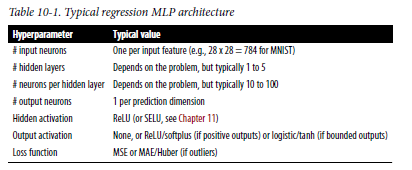

- If you wanna predict single value you will use one output neuron.
- For multivariate regression you will need one output neuron per dimension.
- Multiple activation functions could be used as mentioned above.

## Classification MLPs ##
- They can also be used for classification , like the image dataset . 
- If each instance belongs to one class out of all classes present , like 0-9 in image classification. Every class would have 1 output neuron generally telling true or false oR use a softmax function which in turns tell you the probability of that instance being in every class which adds up to 1.

## **Implimenting neural networks with Keras** ##

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [6]:
tf.__version__

'2.17.0'

In [7]:
keras.__version__

'3.4.1'

In [8]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [9]:
X_train_full.shape,X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

**Making a validation set and scaling down the data by dividing with 255 so they come between 0-1 as we need to use gradient descent**

In [10]:
X_val,X_train=X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_val,y_train=y_train_full[:5000] , y_train_full[5000:]

In [11]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [13]:
model=Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model=Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6936 - loss: 0.9895 - val_accuracy: 0.8364 - val_loss: 0.4958
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8277 - loss: 0.4958 - val_accuracy: 0.8448 - val_loss: 0.4439
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8419 - loss: 0.4509 - val_accuracy: 0.8572 - val_loss: 0.4227
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8544 - loss: 0.4156 - val_accuracy: 0.8658 - val_loss: 0.3928
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8610 - loss: 0.3933 - val_accuracy: 0.8626 - val_loss: 0.3919
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8680 - loss: 0.3743 - val_accuracy: 0.8700 - val_loss: 0.3778
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8721 - loss: 0.3632 - val_accuracy: 0.8640 - val_loss: 0.3896
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.3490 - 

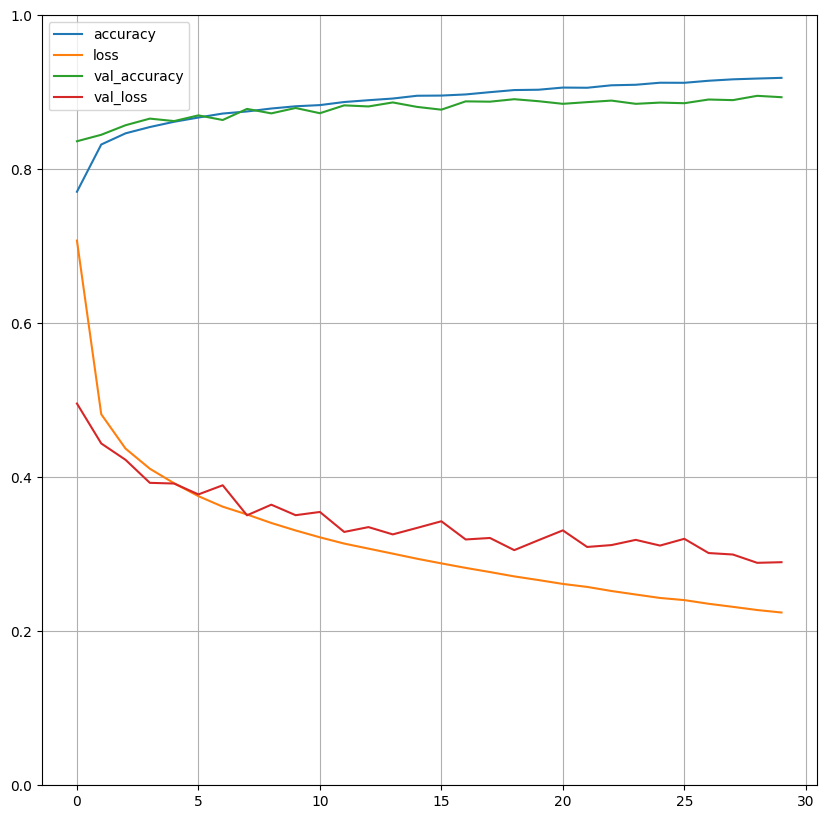

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:

model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8504 - loss: 62.6957


[64.79944610595703, 0.8454999923706055]

In [20]:
X_new=X_test[:10]
y_proba=model.predict(X_new)
x=np.argmax(y_proba,axis=1)
for i in range (0,3):
    print(class_names[x[i]])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Ankle boot
Pullover
Trouser


## ***Building Regression MLP using Sequential API*** ##

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_val=scaler.fit_transform(X_val)


In [39]:
model=Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20


c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7654 - val_loss: 0.6024
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7217 - val_loss: 2.1437
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9585 - val_loss: 2.1033
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3525 - val_loss: 7.4075
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4532 - val_loss: 8.2892
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4070 - val_loss: 9.1153
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4010 - val_loss: 9.3109
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3948 - val_loss: 10.2209
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3749 - val_loss: 10.5606
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3844 - val_loss: 11.3909
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3751 - val_loss: 12.0360
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

In [23]:
X_new=X_test[:3]
y_prob=model.predict(X_new)
y_prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[4.867809  ],
       [0.92092407],
       [1.9313293 ]], dtype=float32)

## **Building Complex models using APIs** ##

**One example of non-sequential model is Wide&Deep , in this model every input is connected directly to output layer which allows neural network to learn both deep patterns (by going deep) and simple**
- *In contrast a regular MLP all the data flow through the full stack of layers*
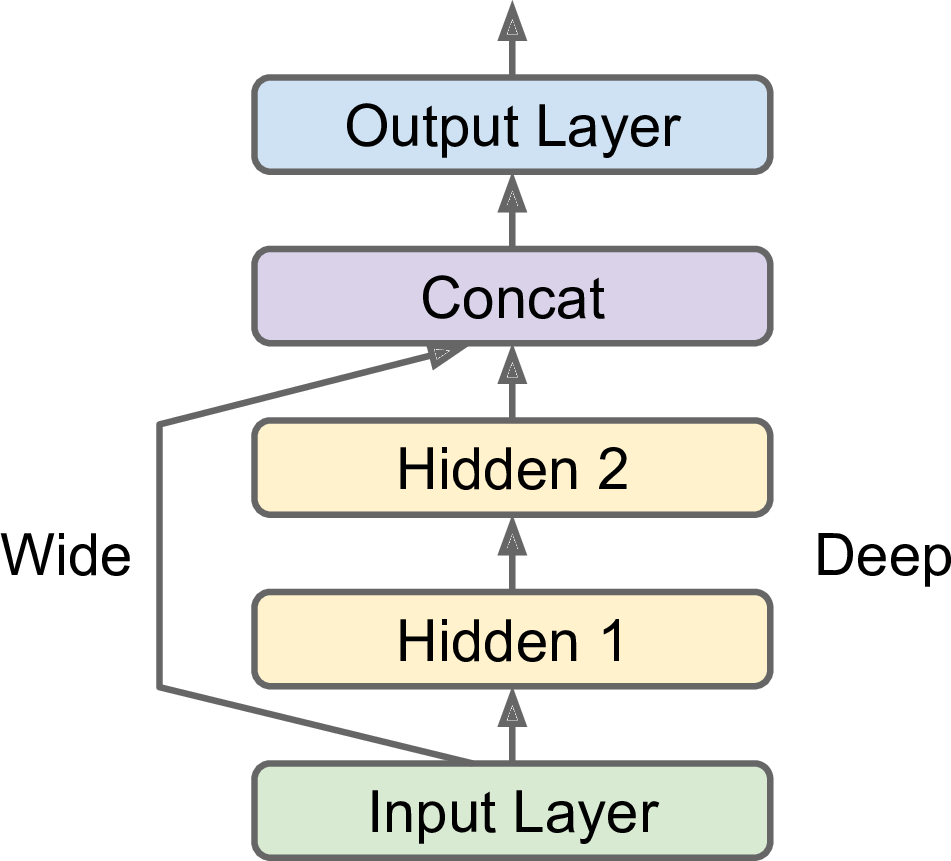

In [24]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])

output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [25]:
model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3184 - val_loss: 3.8893
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.8924 - val_loss: 0.7181
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 114.0115 - val_loss: 0.6585
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5723 - val_loss: 1.3720
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7126 - val_loss: 0.8809
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5490 - val_loss: 0.7475
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7223 - val_loss: 0.5890
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0582 - val_loss: 0.5374
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5178 - val_loss: 0.5938
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5314 - val_loss: 0.5630
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5579 - val_loss: 0.6303
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

**But if you want a subset of inputs going through wide path and some from the deep path, you use**
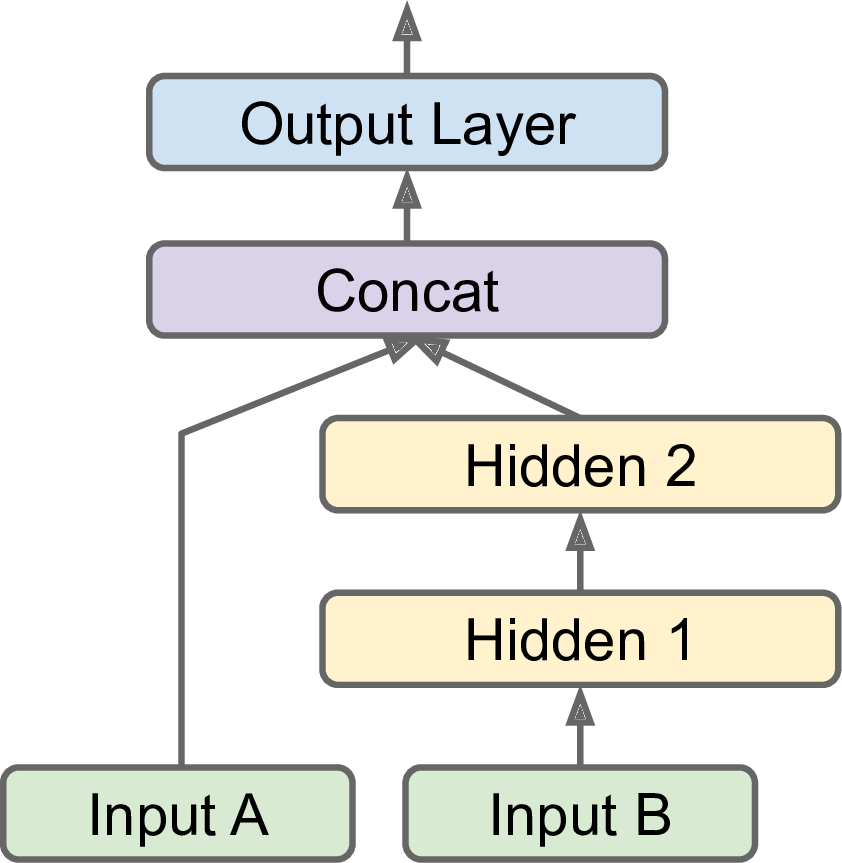

In [26]:
inputA=keras.layers.Input(shape=[5],name='wide_input')
inputB=keras.layers.Input(shape=[6],name='deep_input')
hidden1=keras.layers.Dense(30,activation='relu')(inputB)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([inputA,hidden2])
output=keras.layers.Dense(1,name="output")(concat)
model=keras.Model(inputs=[inputA,inputB],outputs=[output])

In [27]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]
X_val_A,X_val_B=X_val[:,:5],X_val[:,2:]
X_new_A,X_new_B=X_test_A[:3],X_test_B[:3]

history=model.fit((X_train_A,X_train_B),y_train,epochs=20,validation_data=((X_val_A,X_val_B),y_val))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2141 - val_loss: 0.9472
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8791 - val_loss: 0.7461
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7078 - val_loss: 0.6917
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6423 - val_loss: 0.6595
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6230 - val_loss: 0.6314
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6135 - val_loss: 0.6113
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5833 - val_loss: 0.5911
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5810 - val_loss: 0.5770
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5494 - val_loss: 0.5641
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5454 - val_loss: 0.5525
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5341 - val_loss: 0.5401
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [28]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4521  


In [29]:
y_pred=model.predict((X_new_A,X_new_B))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[4.9939785 ],
       [0.57476914],
       [1.7984544 ]], dtype=float32)

## **Subclassing API** ##
- So far we have wittnessed the structural networks in which you have to pre define the layers and how will they receive data (in what order). Its benifit is that it's easy to visualise this and debug it before even the data is passed through the model , but it's downside is static and doesn't support branching ,loops and other dynamic behaviours . For such cases Subclassing API is used:
- It's just a model class, you make a class of the model involving the layers , you then make a instance of that class (i.e. wide&deep class):

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Concatenate

class WideAndDeep(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super(WideAndDeep, self).__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
        self.concat = Concatenate()

    def call(self, inputs):
        inputA, inputB = inputs
        hidden1 = self.hidden1(inputB)
        hidden2 = self.hidden2(hidden1)
        concat = self.concat([inputA, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


model=WideAndDeep()

In [40]:
model.save("my_keras_model.keras")

## **Using Callbacks** ##
- Callbacks are used to save the checkpoints while training on different epochs or save the best model i.e. when no significant imrovement is shown on validation set when increasing epochs , it stops and save the perimeters of the best model .

In [48]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras",
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
validation_data=(X_val, y_val),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3079 - val_loss: 24.8845
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3075 - val_loss: 24.9756
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3080 - val_loss: 25.5393
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3054 - val_loss: 25.0356
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3125 - val_loss: 25.6676
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3088 - val_loss: 25.3751
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3445 - val_loss: 25.5892
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3144 - val_loss: 26.1355
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3067 - val_loss: 25.6788
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3026 - val_loss: 26.0630
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3250 - val_loss: 25.6712


## **Tensorboards** ##

**They help you visualise the data the losses and accuracies while training you model. Moreover they allow you to visualise the image being recognized and voice being recognized.You simply write to binary log files and tensor board monitor that log directory.**

In [63]:
import os,time
root_logdir=os.path.join(os.curdir,"my_logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    log_dir = os.path.join(root_logdir, run_id)
    print(f"Generated log directory path: {log_dir}")  # Debug print
    return log_dir

run_logdir=get_run_logdir()
tensorboard_cb=keras.callbacks.TensorBoard(log_dir=run_logdir)
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val),callbacks=[tensorboard_cb])


Generated log directory path: .\my_logs\run_2024_08_02-16_08_57
Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2832 - val_loss: 29.0062
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2748 - val_loss: 28.5027
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2843 - val_loss: 28.2352
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2809 - val_loss: 28.0925
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2933 - val_loss: 28.2460
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2879 - val_loss: 27.9363
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2979 - val_loss: 28.8393
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2846 - val_loss: 28.7025
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2789 - val_loss: 28.5039
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2906 - val_loss: 28.3470
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.27

In [64]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3412), started 0:23:52 ago. (Use '!kill 3412' to kill it.)